# CLUSTERING AGGLOMERATIVE

In [115]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward, complete, average

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


from scipy.spatial.distance import cdist

In [46]:
df = pd.read_csv('ilustrasi k means.csv', sep=';')
X=df
X.head()

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


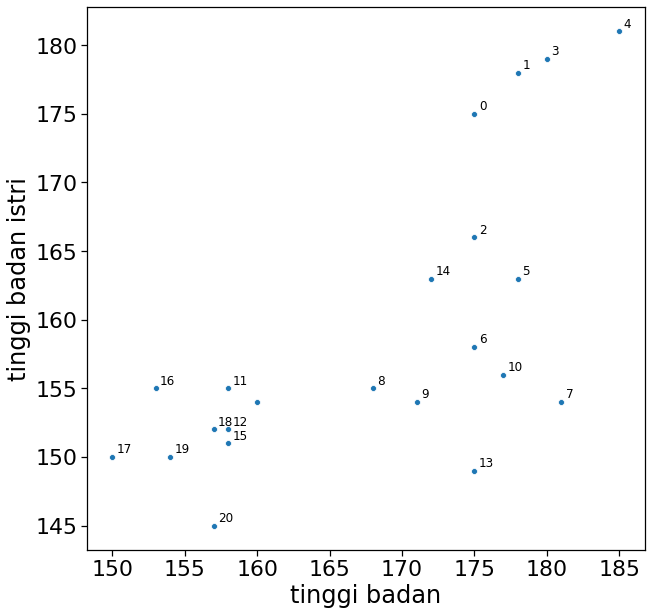

In [47]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='tinggibadan', y='tinggibadanistri', data=df)

plt.xlabel('tinggi badan')
plt.ylabel('tinggi badan istri')

for i,txt in enumerate(range(0,df.shape[0]-1)):
    plt.annotate(txt,(df['tinggibadan'][i]+0.3, df['tinggibadanistri'][i]+0.3), fontsize=12)


## Dendogram

In [48]:
# from scipy.cluster.hierarchy import dendrogram, ward, complete, average

### Ward

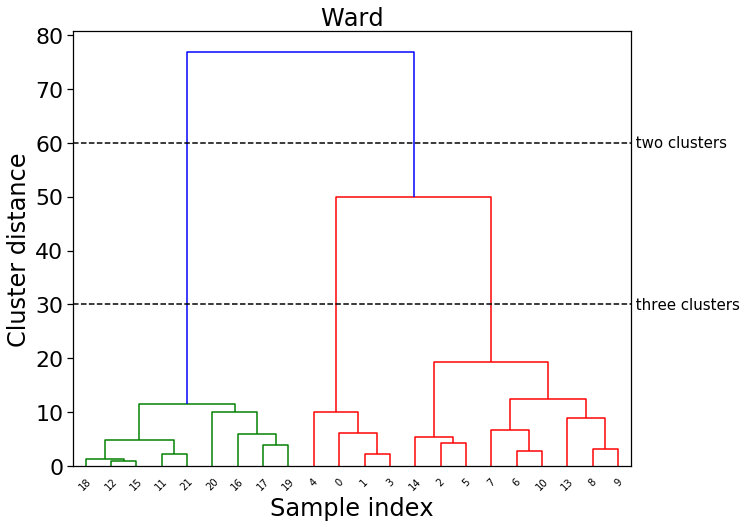

In [49]:
# Ward

linkage_array = ward(X)

plt.figure(figsize = (10,8))

dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [60, 60], '--', c='k')
ax.plot(bounds, [30, 30], '--', c='k')
ax.text(bounds[1], 60, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 30, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Ward')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()


### Complete

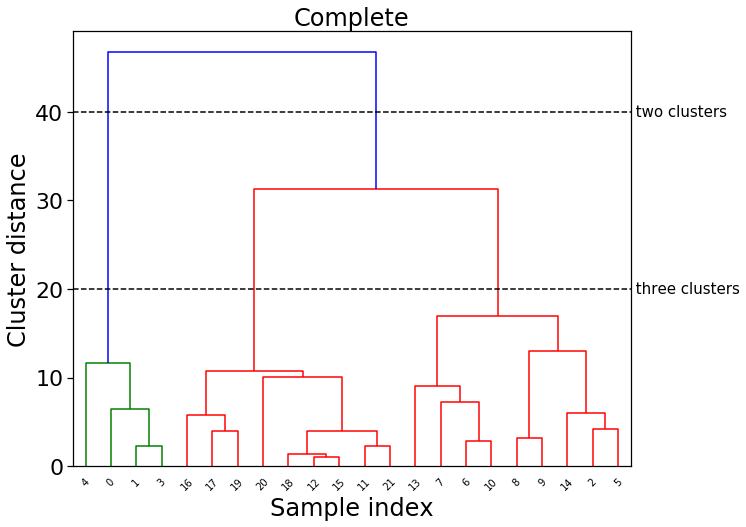

In [50]:
linkage_array = complete(X)

plt.figure(figsize = (10,8))

dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [40, 40], '--', c='k')
ax.plot(bounds, [20, 20], '--', c='k')
ax.text(bounds[1], 40, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 20, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Complete')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()

### Average

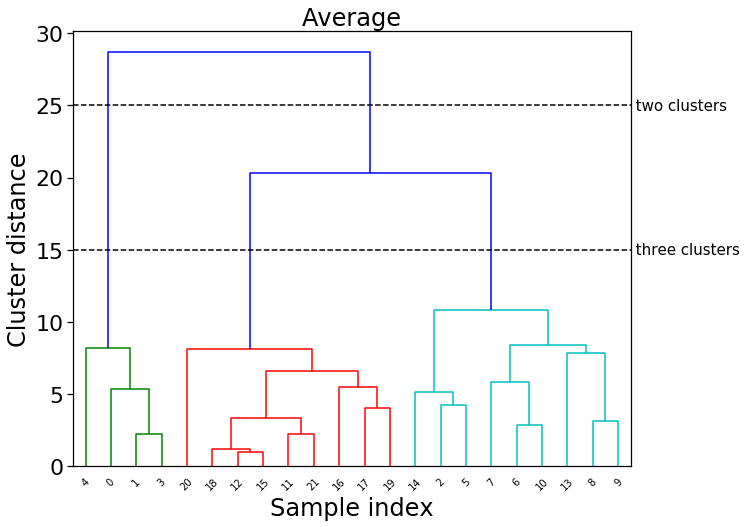

In [51]:
linkage_array = average(X)

plt.figure(figsize = (10,8))

dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [25, 25], '--', c='k')
ax.plot(bounds, [15, 15], '--', c='k')
ax.text(bounds[1], 25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 15, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Average')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()

## Result Comparison

In [52]:
# default (n_clusters=2, linkage='ward')

agg_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['ward'] = agg_ward.fit_predict(X)

agg_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
df['complete'] = agg_complete.fit_predict(X)

agg_average = AgglomerativeClustering(n_clusters=3, linkage='average')
df['average'] = agg_average.fit_predict(X)

df.head()

,tinggibadan,tinggibadanistri,ward,complete,average
0,175,175,2,1,1
1,178,178,2,1,1
2,175,166,0,0,0
3,180,179,2,1,1
4,185,181,2,1,1


In [53]:
# scatterplot

# CLUSTERING DBSCAN

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
clusters = dbscan.fit_predict(X_scaled)

In [56]:
print(clusters)

[-1 -1  0 -1 -1  0  0  0  0  0  0  1  1  0  0  1  1  1  1  1  1  1]


In [57]:
silhouette_score(X_scaled, clusters)

0.8201288826817884

## Optimizing Minimum Samples and Epsilon

In [58]:
for eps in [i/10 for i in range(6,8)]:
    for min_sample in range(4,6):
        print('\neps={}'.format(eps))
        print(f'min_sample={min_sample}')
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        labels = dbscan.fit_predict(X_scaled)
        silh = silhouette_score(X_scaled, labels)
        print(f'cluster present: {np.unique(labels)}')
        print(f'cluster size: {np.bincount(labels+1)}')
        print(f'silhoutte score: {silh}')


eps=0.6
min_sample=4
cluster present: [-1  0  1]
cluster size: [7 6 9]
silhoutte score: 0.5234171355789126

eps=0.6
min_sample=5
cluster present: [-1  0  1]
cluster size: [8 5 9]
silhoutte score: 0.44923301155598255

eps=0.7
min_sample=4
cluster present: [0 1 2]
cluster size: [0 4 9 9]
silhoutte score: 0.8201288826817884

eps=0.7
min_sample=5
cluster present: [-1  0  1]
cluster size: [4 9 9]
silhoutte score: 0.8201288826817884


## Cara Baca

    cluster present: [0 1 2] 

    cluster size:  [0 4 9 9] 

- cluster -1 berjumlah 0 data
- cluster 0  berjumlah 4 data 
- cluster 1  berjumlah 9 data 
- cluster 2  berjumlah 9 data 


### Kesimpulan

- ambil yg ga ada noise (-1)
- ambil yg silhouette score paling besar

## Final Result

In [59]:
dbscan = DBSCAN(eps=0.7, min_samples=4)
clusters = dbscan.fit_predict(X_scaled)

print('cluster: ',clusters)

print('silh score: ',silhouette_score(X_scaled, clusters))

cluster:  [0 0 1 0 0 1 1 1 1 1 1 2 2 1 1 2 2 2 2 2 2 2]
silh score:  0.8201288826817884


In [62]:
df['clusters'] = clusters

Text(0, 0.5, 'tinggi badan istri')

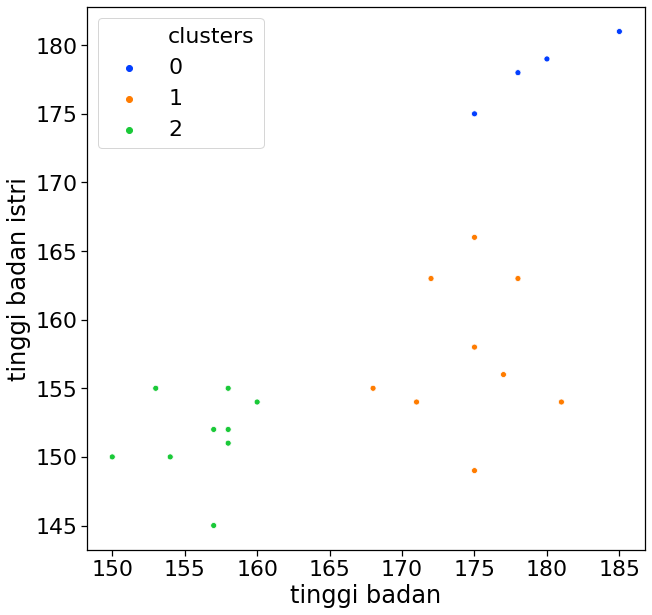

In [63]:
# scatter plot
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan', 
    y = 'tinggibadanistri', 
    hue = 'clusters',
    data = df,
    palette='bright')

plt.xlabel('tinggi badan')
plt.ylabel('tinggi badan istri')

# LATIHAN

**Analisis Mall_Customers.csv**

Gunakan features `Age` dan `Spending Score`, scaling features tersebut dengan standard scaler, lalu bandingkan performa dan hasil clustering dengan metode K-means, agglomerative dan DB SCAN.  

*  Gunakan silhouette score untuk mencari parameter terbaik


In [225]:
# load data
df_mall = pd.read_csv('Mall_Customers.csv')
df_mall = df_mall.drop(columns=['CustomerID'])
df_mall['Gender'] = np.where(df_mall['Gender']=='Male', 0, 1)

In [226]:
X = df_mall[['Age','Spending Score (1-100)']]
X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [227]:
# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['Age','Spending Score (1-100)'])
X_scaled

,Age,Spending Score (1-100)
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980
...,...,...
195,-0.276302,1.118061
196,0.441365,-0.861839
197,-0.491602,0.923953
198,-0.491602,-1.250054


## K Means

In [228]:
# clustering variation
number_of_cluster = range(2,11)
clusterings = [KMeans(n_clusters=k).fit(X_scaled) for k in number_of_cluster]
centroids = [k.cluster_centers_ for k in clusterings]

# within sumsq
D_k = [cdist(X_scaled, cent, 'euclidean') for cent in centroids] 
cIdx = [np.argmin(D, axis=1) for D in D_k] 
dist = [np.min(D, axis=1) for D in D_k] 
avgWithinSS = [sum(d)/X_scaled.shape[0] for d in dist]

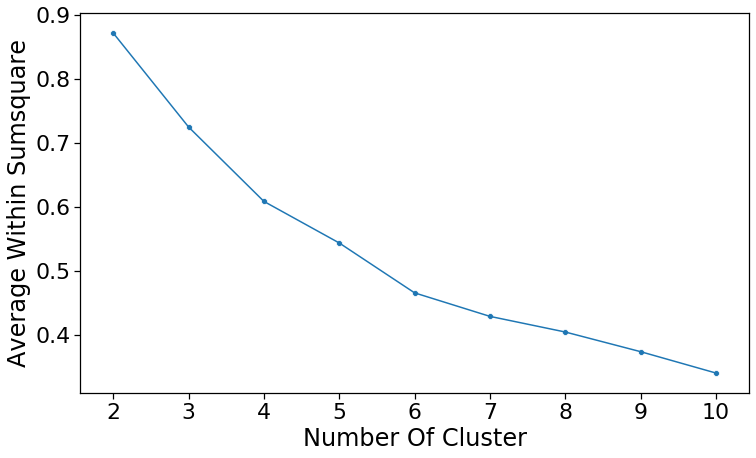

In [229]:
plt.figure(figsize=(12,7))
sns.lineplot(number_of_cluster, avgWithinSS)
sns.scatterplot(number_of_cluster, avgWithinSS)

plt.xticks(number_of_cluster)

plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within Sumsquare')
plt.show()

In [230]:
silhouette_scores = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled) 

    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled, labels, metric= 'euclidean'))

<function matplotlib.pyplot.show(*args, **kw)>

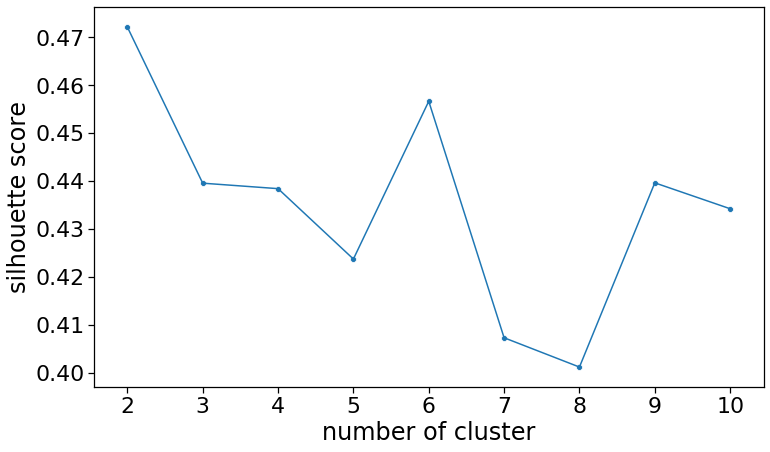

In [231]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xlabel('number of cluster')
plt.ylabel('silhouette score')
plt.show

In [232]:
# ambil n_cluster dari silhoutte score tertinggi
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [233]:
df_mall['clusters'] = kmeans.labels_
df_mall

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,0,19,15,39,0
1,0,21,15,81,1
2,1,20,16,6,0
3,1,23,16,77,1
4,1,31,17,40,0
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,0
197,0,32,126,74,1
198,0,32,137,18,0


In [234]:
print('silh score: ', silhouette_score(X_scaled, kmeans.labels_))

silh score:  0.43914413214921866


Text(0, 0.5, 'Spending Score (1-100)')

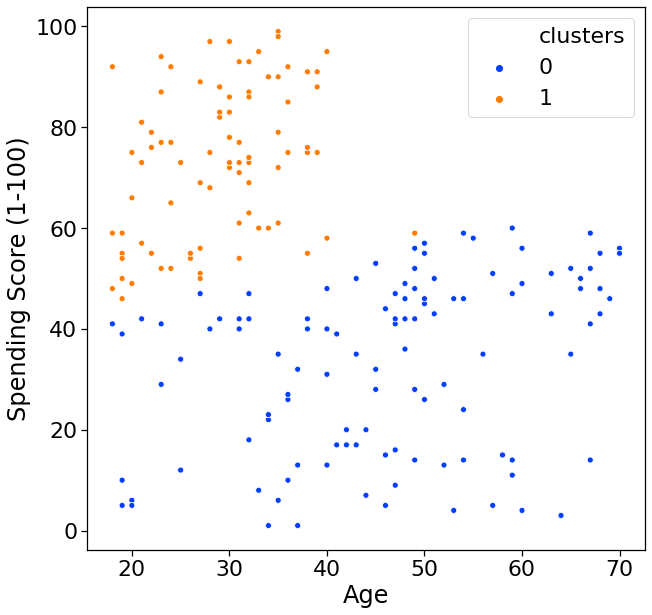

In [235]:
# scatter plot
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Age', 
    y = 'Spending Score (1-100)', 
    hue = 'clusters',
    data = df_mall,
    palette='bright')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

## Agglomerative

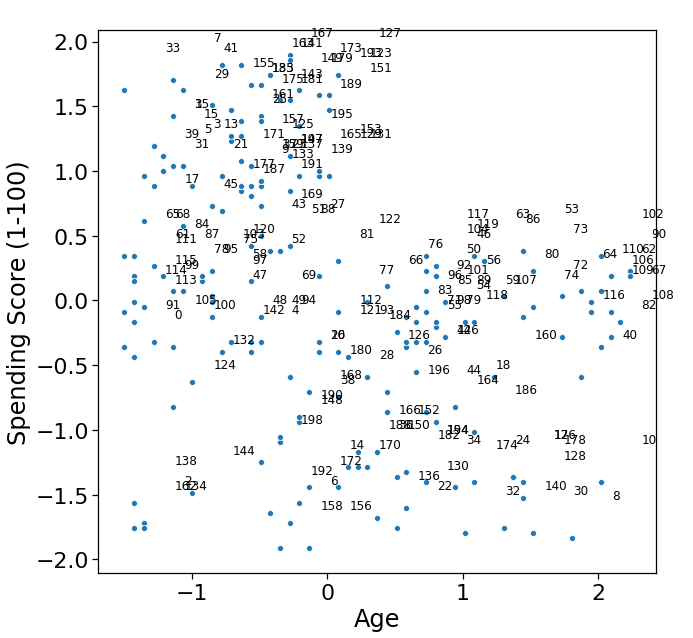

In [236]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=X_scaled)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

for i,txt in enumerate(range(0,X_scaled.shape[0]-1)):
    plt.annotate(txt,(X_scaled['Age'][i]+0.3, X_scaled['Spending Score (1-100)'][i]+0.3), fontsize=12)

In [237]:
# Result Comparison

agg_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_mall['ward'] = agg_ward.fit_predict(X_scaled)

agg_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
df_mall['complete'] = agg_complete.fit_predict(X_scaled)

agg_average = AgglomerativeClustering(n_clusters=3, linkage='average')
df_mall['average'] = agg_average.fit_predict(X_scaled)

df_mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters,ward,complete,average
0,0,19,15,39,0,1,0,2
1,0,21,15,81,1,2,2,2
2,1,20,16,6,0,1,0,1
3,1,23,16,77,1,2,2,2
4,1,31,17,40,0,1,0,2


In [238]:
print('silh score: ', silhouette_score(X_scaled, df_mall['average']))

silh score:  0.4189434186450015


Text(0, 0.5, 'Spending Score (1-100)')

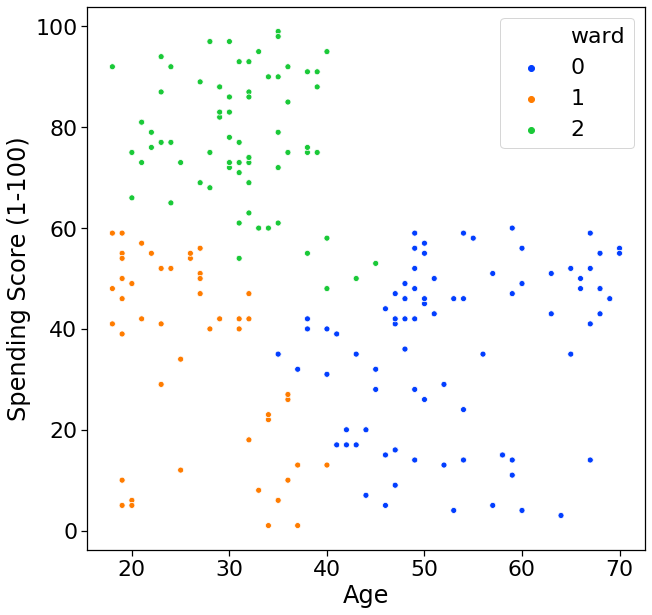

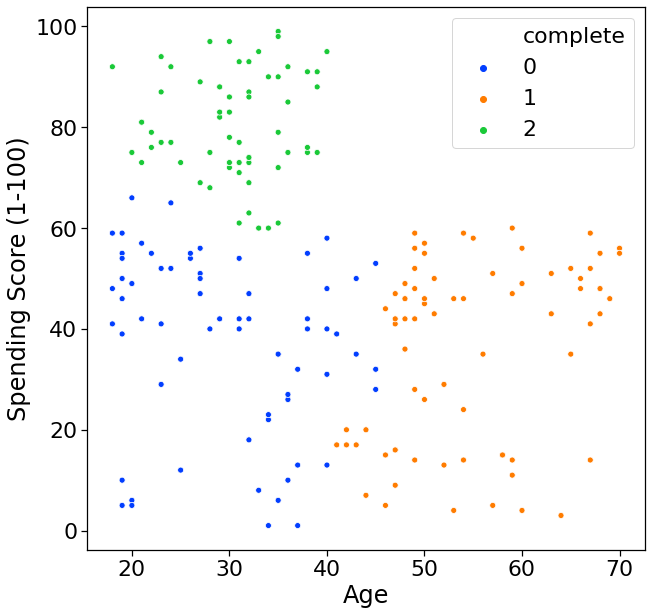

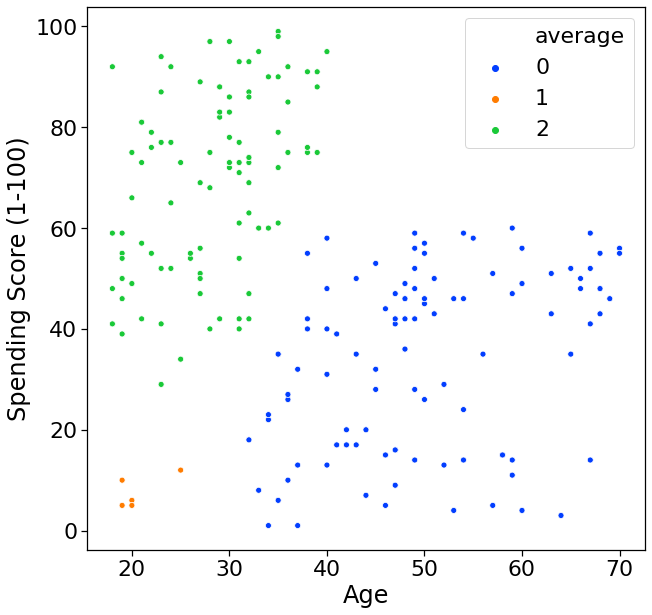

In [239]:
# ward
plt.figure(figsize = (10,10))

sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Age', 
    y = 'Spending Score (1-100)', 
    hue = 'ward',
    data = df_mall,
    palette='bright')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# complete
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Age', 
    y = 'Spending Score (1-100)', 
    hue = 'complete',
    data = df_mall,
    palette='bright')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# average
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Age', 
    y = 'Spending Score (1-100)', 
    hue = 'average',
    data = df_mall,
    palette='bright')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

## DBScan

In [240]:
X_scaled = pd.DataFrame(X_scaled, columns=['Age','Spending Score (1-100)'])
X_scaled.head()

,Age,Spending Score (1-100)
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980


In [241]:
# optimizing epsilon dan min_samples

for eps in [i/10 for i in range(1,6)]:
    for min_sample in range(4,8):
        print('\neps={}'.format(eps))
        print(f'min_sample={min_sample}')
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        labels = dbscan.fit_predict(X_scaled)
        silh = silhouette_score(X_scaled, labels)
        print(f'cluster present: {np.unique(labels)}')
        print(f'cluster size: {np.bincount(labels+1)}')
        print(f'silhoutte score: {silh}')


eps=0.1
min_sample=4
cluster present: [-1  0  1]
cluster size: [188   8   4]
silhoutte score: -0.41245620233423735

eps=0.1
min_sample=5
cluster present: [-1  0]
cluster size: [192   8]
silhoutte score: -0.11720203479877325

eps=0.1
min_sample=6
cluster present: [-1  0]
cluster size: [192   8]
silhoutte score: -0.11720203479877325

eps=0.1
min_sample=7
cluster present: [-1  0]
cluster size: [192   8]
silhoutte score: -0.11720203479877325

eps=0.2
min_sample=4
cluster present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
cluster size: [69  4  9  6 33  4  6 19  5 18 13  4  6  4]
silhoutte score: 0.08784364464566373

eps=0.2
min_sample=5
cluster present: [-1  0  1  2  3  4  5  6  7  8  9]
cluster size: [101   9  21   6  19   5   9   9  12   4   5]
silhoutte score: -0.036144084976266005

eps=0.2
min_sample=6
cluster present: [-1  0  1  2  3  4  5]
cluster size: [132   8  20  16   7   9   8]
silhoutte score: -0.11517918564651712

eps=0.2
min_sample=7
cluster present: [-1  0  1  2]
cluster s

In [242]:
# scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# fit dbscan
dbscan = DBSCAN(eps=0.5, min_samples=4)
clusters_dbs = dbscan.fit_predict(X_scaled)

print('cluster: \n',clusters_dbs)


cluster: 
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [243]:
print('silh score: ', silhouette_score(X_scaled, clusters))

silh score:  0.25121185339433993


In [244]:
df_mall['clusters_dbs'] = dbscan.labels_
df_mall

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters,ward,complete,average,clusters_dbs
0,0,19,15,39,0,1,0,2,0
1,0,21,15,81,1,2,2,2,0
2,1,20,16,6,0,1,0,1,1
3,1,23,16,77,1,2,2,2,0
4,1,31,17,40,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...
195,1,35,120,79,1,2,2,2,0
196,1,45,126,28,0,0,0,0,0
197,0,32,126,74,1,2,2,2,0
198,0,32,137,18,0,1,0,0,0


Text(0, 0.5, 'Spending Score (1-100)')

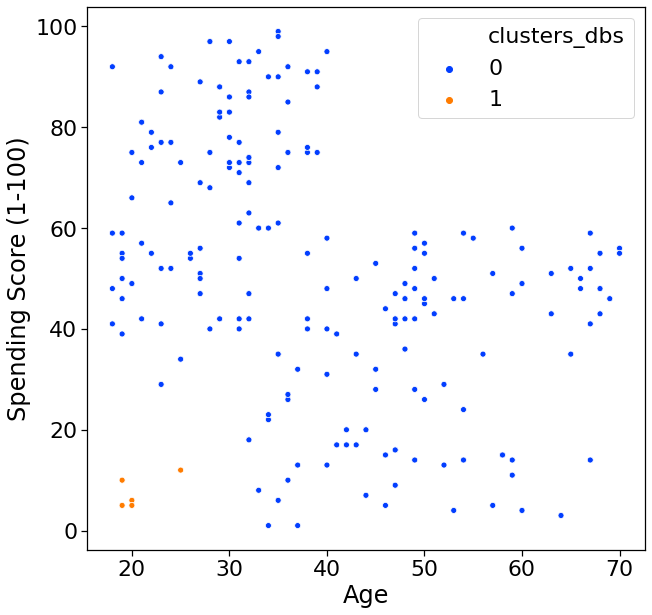

In [245]:
# dbs
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Age', 
    y = 'Spending Score (1-100)', 
    hue = 'clusters_dbs',
    data = df_mall,
    palette='bright')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')